In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
##Loading Dataset
df = pd.read_csv("StudentsPerformance.csv")  # change path if needed
print(df.shape)

(1000, 8)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [47]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [48]:
df['gender'] = df['gender'].map({'male': 0, 'female': 1})

In [49]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,none,72,72,74
1,1,group C,some college,standard,completed,69,90,88
2,1,group B,master's degree,standard,none,90,95,93
3,0,group A,associate's degree,free/reduced,none,47,57,44
4,0,group C,some college,standard,none,76,78,75


In [50]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [51]:
df = pd.get_dummies(df, columns=['race/ethnicity'], drop_first=True)

In [52]:
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,bachelor's degree,standard,none,72,72,74,True,False,False,False
1,1,some college,standard,completed,69,90,88,False,True,False,False
2,1,master's degree,standard,none,90,95,93,True,False,False,False
3,0,associate's degree,free/reduced,none,47,57,44,False,False,False,False
4,0,some college,standard,none,76,78,75,False,True,False,False


In [53]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [54]:
## Education Map
education_map = {
    "some high school":0,
    "high school":1,
    "associate's degree":2,
    "some college":3,
    "bachelor's degree": 4,
    "master's degree": 5
}

df['parental level of education'] = df['parental level of education'].map(education_map)

In [55]:
df.head()


,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,4,standard,none,72,72,74,True,False,False,False
1,1,3,standard,completed,69,90,88,False,True,False,False
2,1,5,standard,none,90,95,93,True,False,False,False
3,0,2,free/reduced,none,47,57,44,False,False,False,False
4,0,3,standard,none,76,78,75,False,True,False,False


In [56]:
##lunch

In [57]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [58]:
df['lunch'] = df['lunch'].map({'standard': 0, 'free/reduced': 1})

In [59]:
##test preparation course
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [60]:
df['test preparation course'] = df['test preparation course'].map({'none':0, 'completed':1})
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,4,0,0,72,72,74,True,False,False,False
1,1,3,0,1,69,90,88,False,True,False,False
2,1,5,0,0,90,95,93,True,False,False,False
3,0,2,1,0,47,57,44,False,False,False,False
4,0,3,0,0,76,78,75,False,True,False,False


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   parental level of education  1000 non-null   int64
 2   lunch                        1000 non-null   int64
 3   test preparation course      1000 non-null   int64
 4   math score                   1000 non-null   int64
 5   reading score                1000 non-null   int64
 6   writing score                1000 non-null   int64
 7   race/ethnicity_group B       1000 non-null   bool 
 8   race/ethnicity_group C       1000 non-null   bool 
 9   race/ethnicity_group D       1000 non-null   bool 
 10  race/ethnicity_group E       1000 non-null   bool 
dtypes: bool(4), int64(7)
memory usage: 58.7 KB


In [62]:
df['avg_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [63]:
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E', 'avg_score'],
      dtype='object')

In [64]:
X = df.drop(columns=['math score', 'reading score', 'writing score'])
X.to_csv("StudentsPerformanceCleaned.csv", index=False)

<Axes: >

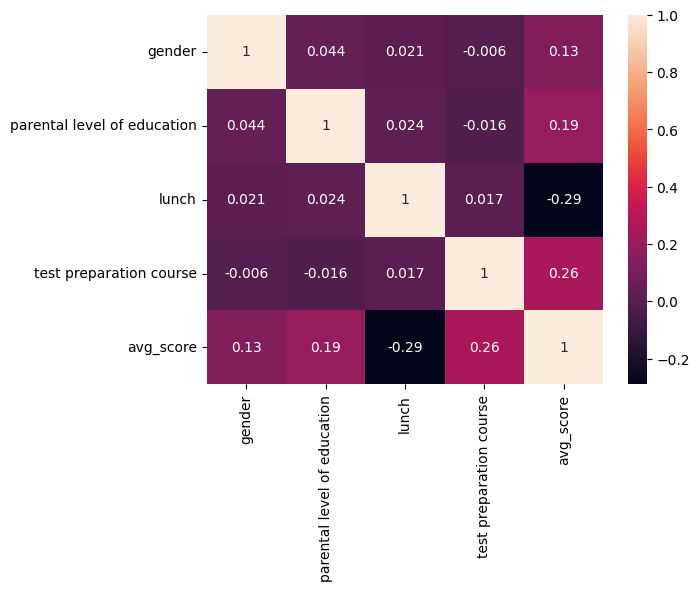

In [69]:
sns.heatmap(X.select_dtypes(include=['int64', 'float64']).corr(), annot=True)